<a href="https://colab.research.google.com/github/yvrjsharma/Keras-edition-deux/blob/main/Keras_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from tensorflow.keras.datasets import mnist


In [33]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [34]:
#60k images which 28 by 28 pixels
train_images.shape 

(60000, 28, 28)

In [35]:
train_labels.shape,train_labels

((60000,), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

In [36]:
test_images.shape

(10000, 28, 28)

In [37]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Let's build the network -

In [38]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

To make the network ready for training, we need three things to happen -
1. A Loss function - Network will use this to measure its performance on training data, and thus to steer itself in the right direction.
2. An Optimizer - A function or mechanism through which network will update itself based on the trainng data and loss function.
3. Metrics - To monitor during training and testing. For example, accuracy or the fraction of images cofrectly classified.



In [39]:
#Compilation step
network.compile(loss="sparse_categorical_crossentropy",
                optimizer="rmsprop",
                metrics=["accuracy"])

In [40]:
#preparing the image data - convert to float
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32")/255

In [28]:
#Encoding categorical variables in target
from tensorflow import keras

train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [41]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [42]:
#Training
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2605 - accuracy: 0.9236
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1034 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0683 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0491 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0366 - accuracy: 0.9888


The network has now learned to associate images with labels. Specifically, the netwrok layers have extracted representation out of the data fed into them. The final layer of Softmax will return an array of 10 probability scores summing upto 1 for every image in test set.

In [43]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
test_loss, test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0720 - accuracy: 0.9785


(0.07197816669940948, 0.9785000085830688)

What are tensors? 

They are multi demiensional Numpy arrays used to store data. They are the building blocks of deep learning networks. A matrix for example, is a 2D tesnsor. So tensors can be defined as a generalization of matrices to an arbitrary number of dimensions. Also keep in mind that for tensors, a dimension is often referred as an axis. 

Vectors are nothing but 1D Tensors or just an array of numbers.

Matrices are nothing but 2D Tensors. So they have two axes (rows, columns).

3D Tensos means packing the the 2D metrices in another array. Similarly, if you pack this 3D Tensor into another array, you will get a 4D Tensor. Example of a 4D tensor would be an RGB image, a 5D tensor would be a video. A batch of 128 greyscale images with 256\*256 size could be stored in a Tensor of (128,256,256,1) shape, while if it would have been RGB images, the tensor would looke like (128,256,256,3). For a video with 60 seconds of length, sampled at 4 frames per second, with size 144\*256, and is RGB, the Tensor would be (240,144,256,3) and if there are 4 such sample clips - would be stored in a (4,240,144,256,3) or a 5D Tensor.

Shape is nothing but how many dimensions are there along each axes.

Lets also keep in mind that Deep Learning models don't process an entire dataset at once; rather, they break the data into small batches. 

In [67]:
import numpy as np
a= np.array(12)
b= np.array([1,2,3,4,5,6.,7,8,9])
c= np.array([[1,2,3],[4,5,6], [7,8,9]])
d= np.array([[[1.,2,3,11,999],[4,5,6,11,999], [7,8,9,11,999], [9,9,9,9,999]],
             [[1,2,3,11,999],[4,5,6,11,999], [7,8,9,11,999], [9,9,9,9,999]],
             [[1,2,3,11,999],[4,5,6,11,999], [7,8,9,11,999], [9,9,9,9,999]]])

a.ndim, a.shape, a.dtype, a

(0, (), dtype('int64'), array(12))

In [65]:
b.ndim, b.shape,b.dtype, b

(1, (9,), dtype('float64'), array([1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [52]:
c.ndim, c.shape, c

(2, (3, 3), array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]))

In [68]:
d.ndim, d.shape,d.dtype, d

(3, (3, 4, 5), dtype('float64'), array([[[  1.,   2.,   3.,  11., 999.],
         [  4.,   5.,   6.,  11., 999.],
         [  7.,   8.,   9.,  11., 999.],
         [  9.,   9.,   9.,   9., 999.]],
 
        [[  1.,   2.,   3.,  11., 999.],
         [  4.,   5.,   6.,  11., 999.],
         [  7.,   8.,   9.,  11., 999.],
         [  9.,   9.,   9.,   9., 999.]],
 
        [[  1.,   2.,   3.,  11., 999.],
         [  4.,   5.,   6.,  11., 999.],
         [  7.,   8.,   9.,  11., 999.],
         [  9.,   9.,   9.,   9., 999.]]]))

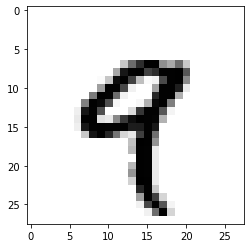

In [81]:
#Tensor slicing, and reshaping
digit = train_images[4].reshape(28,28)
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

All transformations learned by deep neural networks cab be reduced to a handful of Tensor Operations applied to numeric data, example - additions, multiplying *etc.* 

Numpy helps in doing element-wise algebraic operations blazingly fast. Numpy uses BLAS or Basic Linear ALgebra Sub-programs to do all the heavy lifting in the background. BLAS does highly parallel and efficient tensor maniultaion and is implemented in low level languages like C or Fortran.

In [1]:
#Broadcasting
import numpy as np
x = np.random.random((32,10))
y = np.random.random((10,))

In [9]:
y.reshape(1,10)

array([[0.68064492, 0.05572055, 0.99493732, 0.89479167, 0.6766261 ,
        0.00466041, 0.98610834, 0.24067052, 0.6750571 , 0.6318219 ]])

In [ ]:
x+y

In [ ]:
y

In [ ]:
x

In [12]:
x = np.random.random((64,3,32,10))
y = np.random.random((32,10))


In [ ]:
z =  np.maximum(x,y)
z

In [17]:
x = np.zeros((300,100))
y = np.transpose(x)
x.shape, y.shape

((300, 100), (100, 300))